In [1]:
from pathlib import Path
import os, yaml, time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


# load the data from the downloaded file
# file_name = 'Data/box_111_DM_particles.npz'
file_name = '../../Data/box_111_DM_particles.npz'
box_ID = file_name.split('/')[-1].split('_')[1]

# get the file size and time before loading 
file_size = os.path.getsize(file_name)
starttime = time.time()
print("File Size in Mega-Bytes:", file_size/10**6)

# load the data file
particle_subsample = np.load(file_name)

# get the particle coordinates 
x, y, z = particle_subsample['x'], particle_subsample['y'], particle_subsample['z']

# get the particle velocities 
vx, vy, vz = particle_subsample['vx'], particle_subsample['vy'], particle_subsample['vz'] 
stoptime = time.time()

print('Particle subsample for box {} has been loaded'.format(box_ID))
print('Time taken:', stoptime-starttime)

File Size in Mega-Bytes: 712.761607
Particle subsample for box 111 has been loaded
Time taken: 6.666549205780029


In [35]:
# print dimensions of cube
print('x min = {}, x max = {}'.format(np.min(x), np.max(x)))
print('y min = {}, y max = {}'.format(np.min(y), np.max(y)))
print('z min = {}, z max = {}'.format(np.min(z), np.max(z)))

# compute the distribution of x-, y-, and z-coordinates 
x_dist, edgesx = np.histogram(x, bins=20)
y_dist, edgesy = np.histogram(y, bins=20)
z_dist, edgesz = np.histogram(z, bins=20)

# compute the centres of the histogram bins for each
centresx = edgesx[:-1] + (edgesx[1] - edgesx[0])/2
centresy = edgesy[:-1] + (edgesy[1] - edgesy[0])/2
centresz = edgesz[:-1] + (edgesz[1] - edgesz[0])/2

# compute the widths of the histogram bins and the plot height for each
widthx = (edgesx[1] - edgesx[0]) * 0.95
widthy = (edgesy[1] - edgesy[0]) * 0.95
widthz = (edgesz[1] - edgesz[0]) * 0.95
plot_heightx = max(x_dist)+0.1*max(x_dist)
plot_heighty = max(y_dist)+0.1*max(y_dist)
plot_heightz = max(z_dist)+0.1*max(z_dist)

# create the figure for the plot
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(18,6))

# plot the data as a bar graph
axs1.bar(centresx, x_dist, width=widthx, color='r', alpha=0.8, label='x-coord distribution')
axs2.bar(centresy, y_dist, width=widthy, color='g', alpha=0.8, label='y-coord distribution')
axs3.bar(centresz, z_dist, width=widthz, color='b', alpha=0.8, label='z-coord distribution')

# set the plot height 
axs1.set_ylim([0, plot_heightx])
axs2.set_ylim([0, plot_heighty])
axs3.set_ylim([0, plot_heightz])

# set the plot labels and legend
axs1.legend(loc="upper left")
axs1.set_xlabel('x-coordinate')
axs1.set_ylabel('particle count')
axs2.legend(loc="upper left")
axs2.set_xlabel('y-coordinate')
axs2.set_ylabel('particle count')
axs3.legend(loc="upper left")
axs3.set_xlabel('z-coordinate')
axs3.set_ylabel('particle count')

# save the figure as a png
path = '../Figures/Particle distribution along the axes for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()  

x min = -1000.0, x max = -500.0
y min = -1000.0, y max = -500.0
z min = -1000.0, z max = -500.0


In [37]:
# split z-data into evenly sized boxes 
boxno = 100
zsize = np.max(z)-np.min(z)
boxsize = zsize/boxno

# create subplots so many z coords can be plotted at once
# 100 is too many to display so I will do 25 at a time
fig, axes = plt.subplots(5,5,figsize=(20,20))
axes = axes.flatten()

# using a mask to split the data into 5mpc regions
zmin = np.min(z)
zmax = zmin+boxsize

# dealing with the first 25 regions
for i in range(25):
    mask = (z >= zmin) & (z < zmax)
    newx = x[mask]
    newy = y[mask]

    # creating a scatterplot of the new masked data
    ax = axes[i]
    ax.scatter(newx,newy,s=0.1)
    ax.set_title(f'{zmin:.0f}mpc <= z < {zmax:.0f}mpc', fontsize=8) 
    ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
    ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
    ax.tick_params(axis='both', which='major',labelsize=6)
    zmin=zmax
    zmax+=boxsize

# saving the first one
path = '../Figures/X-Y plane between -1000mpc and -875mpc for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

# I am rly lazy so I will copy and paste it for now and maybe fix it up later
fig, axes = plt.subplots(5,5,figsize=(20,20))
axes = axes.flatten()
for i in range(25):
    mask = (z >= zmin) & (z < zmax)
    newx = x[mask]
    newy = y[mask]
    ax = axes[i]
    ax.scatter(newx,newy,s=0.1)
    ax.set_title(f'{zmin:.0f}mpc <= z < {zmax:.0f}mpc', fontsize=8) 
    ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
    ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
    ax.tick_params(axis='both', which='major',labelsize=6)
    zmin=zmax
    zmax+=boxsize
path = '../Figures/X-Y plane between -875mpc and -750mpc for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
fig, axes = plt.subplots(5,5,figsize=(20,20))
axes = axes.flatten()
for i in range(25):
    mask = (z >= zmin) & (z < zmax)
    newx = x[mask]
    newy = y[mask]
    ax = axes[i]
    ax.scatter(newx,newy,s=0.1)
    ax.set_title(f'{zmin:.0f}mpc <= z < {zmax:.0f}mpc', fontsize=8) 
    ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
    ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
    ax.tick_params(axis='both', which='major',labelsize=6)
    zmin=zmax
    zmax+=boxsize
path = '../Figures/X-Y plane between -750mpc and -625mpc for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
fig, axes = plt.subplots(5,5,figsize=(20,20))
axes = axes.flatten()
for i in range(25):
    mask = (z >= zmin) & (z < zmax)
    newx = x[mask]
    newy = y[mask]
    ax = axes[i]
    ax.scatter(newx,newy,s=0.1)
    ax.set_title(f'{zmin:.0f}mpc <= z < {zmax:.0f}mpc', fontsize=8) 
    ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
    ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
    ax.tick_params(axis='both', which='major',labelsize=6)
    zmin=zmax
    zmax+=boxsize
path = '../Figures/X-Y plane between -625mpc and -500mpc for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

In [ ]:
# using the same x and y data, creating a 2d histogram
hist, xed, yed, colours = plt.hist2d(x,y,bins=625)
cbar = plt.colorbar(colours)
cbar.set_label('Number of particles')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
path = '../Figures/X-Y plane density plot for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

# going to zoom in different sections with 4x the number of boxes
lowery = -1000
fig, axes = plt.subplots(5,5,figsize=(20,20))
for i in range(5):
    uppery = lowery+100
    lowerx = -1000
    for j in range(5):
        upperx = lowerx+100
        masknew = (x >= lowerx) & (x < upperx) & (y >= lowery) & (y < uppery)
        xnew=x[masknew]
        ynew=y[masknew]
        ax = axes[i][j]
        hist,xed,yed,colours=ax.hist2d(xnew,ynew,bins=100)
        cbar=plt.colorbar(colours)
        cbar.ax.tick_params(labelsize=6)
        ax.tick_params(axis='both', which='major',labelsize=6)
        ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
        ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
        lowerx=upperx
    lowery = uppery
path = '../Figures/X-Y plane density plot in 25 sections for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

In [4]:
# now doing some simple plots of the velocities as well
vx_dist, edgesvx = np.histogram(vx, bins=20)
vy_dist, edgesvy = np.histogram(vy, bins=20)
vz_dist, edgesvz = np.histogram(vz, bins=20)
centresvx = edgesvx[:-1] + (edgesvx[1] - edgesvx[0])/2
centresvy = edgesvy[:-1] + (edgesvy[1] - edgesvy[0])/2
centresvz = edgesvz[:-1] + (edgesvz[1] - edgesvz[0])/2
widthvx = (edgesvx[1] - edgesvx[0]) * 0.95
widthvy = (edgesvy[1] - edgesvy[0]) * 0.95
widthvz = (edgesvz[1] - edgesvz[0]) * 0.95
plot_heightvx = max(vx_dist)+0.1*max(vx_dist)
plot_heightvy = max(vy_dist)+0.1*max(vy_dist)
plot_heightvz = max(vz_dist)+0.1*max(vz_dist)
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(18,6))
axs1.bar(centresvx, vx_dist, width=widthvx, color='r', alpha=0.8, label='vx-coord distribution')
axs2.bar(centresvy, vy_dist, width=widthvy, color='g', alpha=0.8, label='vy-coord distribution')
axs3.bar(centresvz, vz_dist, width=widthvz, color='b', alpha=0.8, label='vz-coord distribution')
axs1.set_ylim([0, plot_heightvx])
axs2.set_ylim([0, plot_heightvy])
axs3.set_ylim([0, plot_heightvz])
axs1.legend(loc="upper left")
axs1.set_xlabel('vx (km/s)')
axs1.set_ylabel('particle count')
axs2.legend(loc="upper left")
axs2.set_xlabel('vy (km/s)')
axs2.set_ylabel('particle count')
axs3.legend(loc="upper left")
axs3.set_xlabel('vz (km/s)')
axs3.set_ylabel('particle count')
path = '../Figures/Particle velocity distribution along the axes for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()  

In [2]:
# Setting up total velocities
vxsmol=vx/1000
vysmol=vy/1000
vzsmol=vz/1000
vt=np.sqrt(vxsmol**2+vysmol**2+vzsmol**2)*1000

In [ ]:
# I will create a similar plot to the ones before, but I will now colour-code each one to indicate total velocity
# This is the same code as above but I've added in a couple lines for colour coding
# Be aware, this does take ages to run to completion
boxno = 100
zsize = np.max(z)-np.min(z)
boxsize = zsize/boxno
fig, axes = plt.subplots(5,5,figsize=(20,20))
axes = axes.flatten()
zmin = np.min(z)
zmax = zmin+boxsize
for i in range(25):
    mask = (z >= zmin) & (z < zmax)
    newx = x[mask]
    newy = y[mask]
    newt = vt[mask]
    ax = axes[i]
    colouring = ax.scatter(newx,newy,c=newt,cmap='viridis',s=0.1)
    cbar = fig.colorbar(colouring, ax=ax)
    ax.set_title(f'{zmin:.0f}mpc <= z < {zmax:.0f}mpc', fontsize=8) 
    ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
    ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
    ax.tick_params(axis='both', which='major',labelsize=6)
    zmin=zmax
    zmax+=boxsize
path = '../Figures/X-Y plane between -1000mpc and -875mpc for box {} WITH VELOCITIES.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
fig, axes = plt.subplots(5,5,figsize=(20,20))
axes = axes.flatten()
for i in range(25):
    mask = (z >= zmin) & (z < zmax)
    newx = x[mask]
    newy = y[mask]
    newt = vt[mask]
    ax = axes[i]
    colouring = ax.scatter(newx,newy,c=newt,cmap='viridis',s=0.1)
    cbar = fig.colorbar(colouring, ax=ax)
    ax.set_title(f'{zmin:.0f}mpc <= z < {zmax:.0f}mpc', fontsize=8) 
    ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
    ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
    ax.tick_params(axis='both', which='major',labelsize=6)
    zmin=zmax
    zmax+=boxsize
path = '../Figures/X-Y plane between -875mpc and -750mpc for box {} WITH VELOCITIES.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
fig, axes = plt.subplots(5,5,figsize=(20,20))
axes = axes.flatten()
for i in range(25):
    mask = (z >= zmin) & (z < zmax)
    newx = x[mask]
    newy = y[mask]
    newt = vt[mask]
    ax = axes[i]
    colouring = ax.scatter(newx,newy,c=newt,cmap='viridis',s=0.1)
    cbar = fig.colorbar(colouring, ax=ax)
    ax.set_title(f'{zmin:.0f}mpc <= z < {zmax:.0f}mpc', fontsize=8) 
    ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
    ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
    ax.tick_params(axis='both', which='major',labelsize=6)
    zmin=zmax
    zmax+=boxsize
path = '../Figures/X-Y plane between -750mpc and -625mpc for box {} WITH VELOCITIES.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
fig, axes = plt.subplots(5,5,figsize=(20,20))
axes = axes.flatten()
for i in range(25):
    mask = (z >= zmin) & (z < zmax)
    newx = x[mask]
    newy = y[mask]
    newt = vt[mask]
    ax = axes[i]
    colouring = ax.scatter(newx,newy,c=newt,cmap='viridis',s=0.1)
    cbar = fig.colorbar(colouring, ax=ax)
    ax.set_title(f'{zmin:.0f}mpc <= z < {zmax:.0f}mpc', fontsize=8) 
    ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
    ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
    ax.tick_params(axis='both', which='major',labelsize=6)
    zmin=zmax
    zmax+=boxsize
path = '../Figures/X-Y plane between -625mpc and -500mpc for box {} WITH VELOCITIES.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

In [7]:
# skinnier slices for a couple of my favourite boxes to visualise particles
# these are -650 to -625 in 1MPC slices
boxsize = 1
fig, axes = plt.subplots(5,5,figsize=(20,20))
axes = axes.flatten()
zmin = -650
zmax = zmin+boxsize
for i in range(25):
    mask = (z >= zmin) & (z < zmax)
    newx = x[mask]
    newy = y[mask]
    ax = axes[i]
    ax.scatter(newx,newy,s=0.1)
    ax.set_title(f'{zmin:.0f}mpc <= z < {zmax:.0f}mpc', fontsize=8) 
    ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
    ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
    ax.tick_params(axis='both', which='major',labelsize=6)
    zmin=zmax
    zmax+=boxsize

# saving the first one
path = '../Figures/X-Y plane between -650mpc and -625mpc for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()


In [8]:
# skinnier slices for a couple of my favourite boxes for densities
# these are from -600<x<-500 and -900<y<-800 in 20MPC slices bc that box looked cool
# will try a couple different bins to see what we get
xlims = -600
ylims = -900
fig, axes = plt.subplots(5,5,figsize=(20,20))
lowery=ylims
for i in range(5):
    uppery = lowery+20
    lowerx = xlims
    for j in range(5):
        upperx = lowerx+20
        masknew = (x >= lowerx) & (x < upperx) & (y >= lowery) & (y < uppery)
        xnew=x[masknew]
        ynew=y[masknew]
        ax = axes[i][j]
        hist,xed,yed,colours=ax.hist2d(xnew,ynew,bins=40)
        cbar=plt.colorbar(colours)
        cbar.ax.tick_params(labelsize=6)
        ax.tick_params(axis='both', which='major',labelsize=6)
        ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
        ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
        lowerx=upperx
    lowery = uppery
path = '../Figures/X-Y plane density plot with sections for -600<=x<-500 and -900<=y<-800 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
# 40 is the smallest I can get, this helps zoom in but doesn't show that much more

In [15]:
# producing one or two density plots
xlims=[-600,-580]
ylims=[-900,-880]
oneboxmask = (x >= xlims[0]) & (x < xlims[1]) & (y >= ylims[0]) & (y < ylims[1])
smallx=x[oneboxmask]
smally=y[oneboxmask]
histbox1, xed1, yed1, colours = plt.hist2d(smallx,smally,bins=40)
cbar = plt.colorbar(colours)
cbar.set_label('Number of particles')
plt.xlabel('x coords')
plt.ylabel('y coords')
path = '../Figures/X-Y plane density plot for -600<=x<-500 and -900<=y<-800 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

xlims=[-1000,-900]
ylims=[-600,-500]
oneboxmask1 = (x >= xlims[0]) & (x < xlims[1]) & (y >= ylims[0]) & (y < ylims[1])
smallx1=x[oneboxmask1]
smally1=y[oneboxmask1]
histbox2, xed2, yed2, colours = plt.hist2d(smallx1,smally1,bins=200)
cbar = plt.colorbar(colours)
cbar.set_label('Number of particles')
plt.xlabel('x coords')
plt.ylabel('y coords')
path = '../Figures/X-Y plane density plot for -1000<=x<-900 and -600<=y<-500 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
# 200 is the absolute smallest bin that can be taken here or it starts fragmenting

In [10]:
# now trying a velocity plot using x and y velocities only
# first I'll just try 25 different 1mpc slices
xlims=[-600,-580]
ylims=[-900,-880]
fig, axes = plt.subplots(5,5,figsize=(20,20))
axes=axes.flatten()
zinit=-550
for i in range(25):
    veloboxmask = (x >= xlims[0]) & (x < xlims[1]) & (y >= ylims[0]) & (y < ylims[1]) & (z >= zinit) & (z < zinit+1)
    posx=x[veloboxmask]
    posy=y[veloboxmask]
    velox=vx[veloboxmask]
    veloy=vy[veloboxmask]
    ax=axes[i]
    ax.quiver(posx,posy,velox,veloy,scale=200,scale_units='xy',angles='xy',alpha=0.5, color='r')
    ax.set_xlim(xlims[0],xlims[1])
    ax.set_ylim(ylims[0],ylims[1])
    ax.set_title(f'{zinit:.0f}mpc <= z < {zinit+1:.0f}mpc', fontsize=8) 
    ax.set_xlabel('x coords')
    ax.set_ylabel('y coords')
    ax.tick_params(axis='both', which='major',labelsize=6)
    ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
    ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
    zinit+=1
path = '../Figures/X-Y plane velocities for -600<=x<-580 and -900<=y<-880 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

In [11]:
# now I'll just chuck the densities underneath
# not sure if this is what I need to do but it's a start
xlims=[-600,-580]
ylims=[-900,-880]
fig, axes = plt.subplots(5,5,figsize=(20,20))
axes=axes.flatten()
zinit=-550
for i in range(25):
    veloboxmask = (x >= xlims[0]) & (x < xlims[1]) & (y >= ylims[0]) & (y < ylims[1]) & (z >= zinit) & (z < zinit+1)
    posx=x[veloboxmask]
    posy=y[veloboxmask]
    velox=vx[veloboxmask]
    veloy=vy[veloboxmask]
    ax=axes[i]
    masknew = (x >= xlims[0]) & (x <= xlims[1]) & (y >= ylims[0]) & (y <= ylims[1])
    xnew=x[masknew]
    ynew=y[masknew]
    hist,xed,yed,colours=ax.hist2d(xnew,ynew,bins=40)
    cbar=plt.colorbar(colours)
    cbar.ax.tick_params(labelsize=6)
    ax.quiver(posx,posy,velox,veloy,scale=200,scale_units='xy',angles='xy',alpha=0.5, color='r')
    ax.set_xlim(xlims[0],xlims[1])
    ax.set_ylim(ylims[0],ylims[1])
    ax.set_title(f'{zinit:.0f}mpc <= z < {zinit+1:.0f}mpc', fontsize=8) 
    ax.set_xlabel('x coords')
    ax.set_ylabel('y coords')
    ax.tick_params(axis='both', which='major',labelsize=6)
    ax.set_ylabel('y coords', fontsize=8, labelpad=-4.5)
    ax.set_xlabel('x coords', fontsize=8, labelpad=-0.5)
    zinit+=1
path = '../Figures/X-Y plane velocities for -600<=x<-580 and -900<=y<-880 for box {} WITH DENSITIES.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
# yeh definitely not sold on what this is doing

In [12]:
# now to do some probability stuff
newhist1=histbox1.flatten()
plt.hist(newhist1,bins=100)
plt.xlabel('Number of particles')
plt.ylabel('Frequency (number of boxes)')
path = '../Figures/X-Y plane histogram of density plot for -600<=x<-500 and -900<=y<-800 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

newhist2=histbox2.flatten()
plt.hist(newhist2,bins=100)
plt.xlabel('Number of particles')
plt.ylabel('Frequency (number of boxes)')
path = '../Figures/X-Y plane histogram of density plot for -1000<=x<-900 and -600<=y<-500 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()


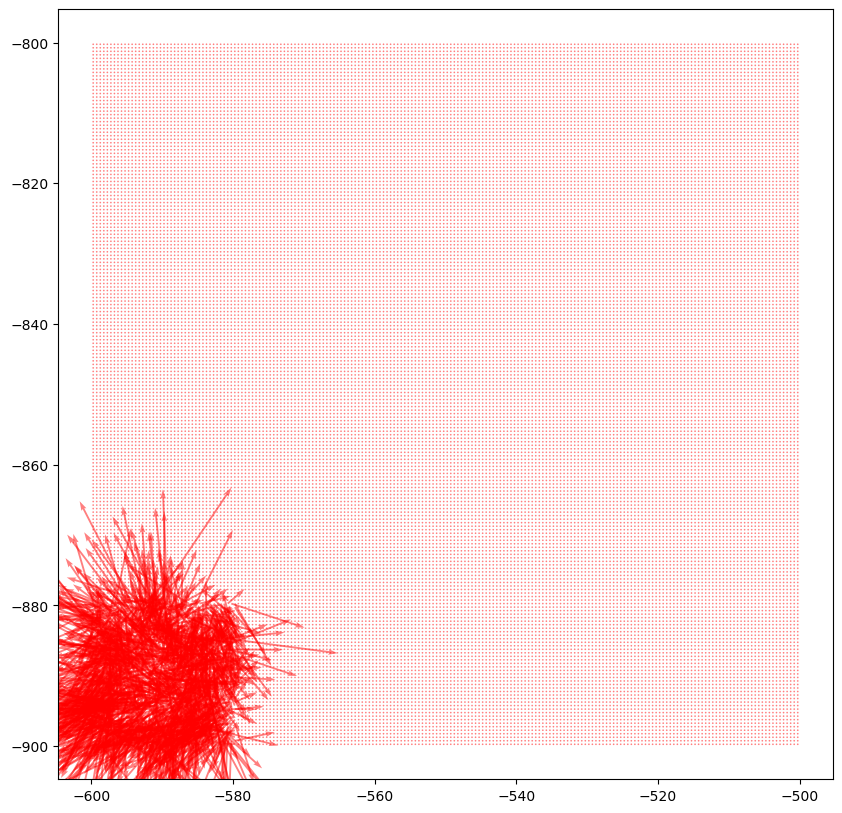

In [ ]:
# probabilities with velocities and standard deviations
# CAREFUL this one overrules the other and puts a bunch of stuff elsewhere 
vt1 = vt[oneboxmask]
vxsmaller = vxsmol[oneboxmask]#
vysmaller = vysmol[oneboxmask]#
xidx = np.digitize(smallx, xed1)-1
yidx = np.digitize(smally, yed1)-1
xidx = np.clip(xidx, 0, 199)
yidx = np.clip(yidx, 0, 199)
meanvelo = np.zeros((200, 200))
counts = np.zeros((200, 200))
velosq = np.zeros((200, 200))
vari = np.zeros((200, 200))
stdv = np.zeros((200, 200))
directx = np.zeros((200,200))#
directy = np.zeros((200,200))#
np.add.at(meanvelo, (xidx, yidx), vt1)
np.add.at(counts, (xidx, yidx), 1)
np.add.at(velosq, (xidx, yidx), vt1**2)
np.add.at(directx, (xidx, yidx), vxsmaller)#
np.add.at(directy, (xidx, yidx), vysmaller)#
meanvelo[counts > 0] /= counts[counts > 0]
directx[counts > 0] /= counts[counts > 0]#
directy[counts > 0] /= counts[counts > 0]#
vari[counts > 0] = (velosq[counts > 0] / counts[counts > 0]) - (meanvelo[counts > 0]**2)
vari = np.maximum(vari, 0)
stdv[counts > 0] = np.sqrt(vari[counts > 0])
oo=np.array(list(np.linspace(-599.75,-500.25,200))*200)
oo=np.sort(oo)
ee=np.array(list(np.linspace(-899.75,-800.25,200))*200)
checkerx=directx.T.flatten()
checkery=directy.T.flatten()
fig=plt.figure(figsize=(10,10))
plt.quiver(oo,ee,checkerx,checkery,scale_units='xy',angles='xy',alpha=0.5, color='r');

In [24]:
# probabilities with velocities and standard deviations
n=40
vt1 = vt[oneboxmask]
vxsmaller = vxsmol[oneboxmask]#
vysmaller = vysmol[oneboxmask]#
xidx = np.digitize(smallx, xed1)-1
yidx = np.digitize(smally, yed1)-1
xidx = np.clip(xidx, 0, n-1)
yidx = np.clip(yidx, 0, n-1)
meanvelo = np.zeros((n, n))
counts = np.zeros((n, n))
velosq = np.zeros((n, n))
vari = np.zeros((n, n))
stdv = np.zeros((n, n))
directx = np.zeros((n,n))#
directy = np.zeros((n,n))#
np.add.at(meanvelo, (xidx, yidx), vt1)
np.add.at(counts, (xidx, yidx), 1)
np.add.at(velosq, (xidx, yidx), vt1**2)
np.add.at(directx, (xidx, yidx), vxsmaller)#
np.add.at(directy, (xidx, yidx), vysmaller)#
meanvelo[counts > 0] /= counts[counts > 0]
directx[counts > 0] /= counts[counts > 0]#
directy[counts > 0] /= counts[counts > 0]#
vari[counts > 0] = (velosq[counts > 0] / counts[counts > 0]) - (meanvelo[counts > 0]**2)
vari = np.maximum(vari, 0)
stdv[counts > 0] = np.sqrt(vari[counts > 0])
oo=np.array(list(np.linspace(-599.75,-580.25,n))*n)
oo=np.sort(oo)
ee=np.array(list(np.linspace(-899.75,-880.25,n))*n)
checkerx=directx.T.flatten()
checkery=directy.T.flatten()
fig=plt.figure(figsize=(10,10))
histbox1, xie, yie, colours = plt.hist2d(smallx,smally,bins=40)
cbar = plt.colorbar(colours)
cbar.set_label('Number of particles')
plt.quiver(oo,ee,checkerx,checkery,scale_units='xy',angles='xy', color='r',label='x-y velocities (km/s)')
plt.xlabel('x coords')
plt.ylabel('y coords')
plt.legend(loc=2)
path = '../Figures/X-Y plane velocity and density plot for -600<=x<-580 and -900<=y<-880 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

In [ ]:
# probabilities with velocities and standard deviations
vt1 = vt[oneboxmask]
vxsmaller = vxsmol[oneboxmask]#
vysmaller = vysmol[oneboxmask]#
xidx = np.digitize(smallx, xed1)-1
yidx = np.digitize(smally, yed1)-1
xidx = np.clip(xidx, 0, 199)
yidx = np.clip(yidx, 0, 199)
meanvelo = np.zeros((200, 200))
counts = np.zeros((200, 200))
velosq = np.zeros((200, 200))
vari = np.zeros((200, 200))
stdv = np.zeros((200, 200))
directx = np.zeros((200,200))#
directy = np.zeros((200,200))#
np.add.at(meanvelo, (xidx, yidx), vt1)
np.add.at(counts, (xidx, yidx), 1)
np.add.at(velosq, (xidx, yidx), vt1**2)
np.add.at(directx, (xidx, yidx), vxsmaller)#
np.add.at(directy, (xidx, yidx), vysmaller)#
meanvelo[counts > 0] /= counts[counts > 0]
directx[counts > 0] /= counts[counts > 0]#
directy[counts > 0] /= counts[counts > 0]#
vari[counts > 0] = (velosq[counts > 0] / counts[counts > 0]) - (meanvelo[counts > 0]**2)
vari = np.maximum(vari, 0)
stdv[counts > 0] = np.sqrt(vari[counts > 0])
plt.figure(figsize=(6, 6))
plt.imshow(meanvelo.T, extent=[xed1[0], xed1[-1], yed1[0], yed1[-1]], cmap='viridis')
plt.colorbar(label='Mean velocity magnitude (km/s)')
plt.xlabel('x coords')
plt.ylabel('y coords')
path = '../Figures/X-Y plane mean velocity plot for -600<=x<-500 and -900<=y<-800 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
plt.figure(figsize=(6, 6))
plt.imshow(stdv.T, extent=[xed1[0], xed1[-1], yed1[0], yed1[-1]], cmap='viridis')
plt.colorbar(label='Velocity standard deviation (km/s)')
plt.xlabel('x coords')
plt.ylabel('y coords')
path = '../Figures/X-Y plane velocity standard deviation plot for -600<=x<-500 and -900<=y<-800 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

vt2 = vt[oneboxmask1]
xidx = np.digitize(smallx1, xed2)-1
yidx = np.digitize(smally1, yed2)-1
xidx = np.clip(xidx, 0, 199)
yidx = np.clip(yidx, 0, 199)
meanvelo1 = np.zeros((200, 200))
counts = np.zeros((200, 200))
velosq = np.zeros((200, 200))
vari1 = np.zeros((200, 200))
stdv1 = np.zeros((200, 200))
np.add.at(meanvelo1, (xidx, yidx), vt2)
np.add.at(counts, (xidx, yidx), 1)
np.add.at(velosq, (xidx, yidx), vt2**2)
meanvelo1[counts > 0] /= counts[counts > 0]
vari1[counts > 0] = (velosq[counts > 0] / counts[counts > 0]) - (meanvelo1[counts > 0]**2)
vari1 = np.maximum(vari1, 0)
stdv1[counts > 0] = np.sqrt(vari1[counts > 0])
plt.figure(figsize=(6, 6))
plt.imshow(meanvelo1.T, extent=[xed2[0], xed2[-1], yed2[0], yed2[-1]], cmap='viridis')
plt.colorbar(label='Mean velocity magnitude (km/s)')
plt.xlabel('x coords')
plt.ylabel('y coords')
path = '../Figures/X-Y plane mean velocity plot for -1000<=x<-900 and -600<=y<-500 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
plt.figure(figsize=(6, 6))
plt.imshow(stdv1.T, extent=[xed2[0], xed2[-1], yed2[0], yed2[-1]], cmap='viridis')
plt.colorbar(label='Velocity standard deviation (km/s)')
plt.xlabel('x coords')
plt.ylabel('y coords')
path = '../Figures/X-Y plane velocity standard deviation plot for -1000<=x<-900 and -600<=y<-500 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

velohist1=meanvelo.T.flatten()
plt.hist(velohist1,bins=100)
plt.xlabel('Mean velocity in box (km/s)')
plt.ylabel('Frequency (number of boxes)')
path = '../Figures/X-Y plane histogram of magnitude of average velocities for -600<=x<-500 and -900<=y<-800 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
stdhist1=stdv.T.flatten()
plt.hist(stdhist1,bins=100)
plt.xlabel('Standard deviation in box (km/s)')
plt.ylabel('Frequency (number of boxes)')
path = '../Figures/X-Y plane histogram of standard deviation of velocities for -600<=x<-500 and -900<=y<-800 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()

velohist2=meanvelo1.T.flatten()
plt.hist(velohist2,bins=100)
plt.xlabel('Mean velocity in box (km/s)')
plt.ylabel('Frequency (number of boxes)')
path = '../Figures/X-Y plane histogram of magnitude of average velocities for -1000<=x<-900 and -600<=y<-500 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()
stdhist2=stdv1.T.flatten()
plt.hist(stdhist2,bins=100)
plt.xlabel('Standard deviation in box (km/s)')
plt.ylabel('Frequency (number of boxes)')
path = '../Figures/X-Y plane histogram of standard deviation of velocities for -1000<=x<-900 and -600<=y<-500 for box {}.png'.format(box_ID)
plt.savefig(path, dpi=300)
plt.close()